#📌 Extracción

In [1]:
import pandas as pd
import requests

# URL del archivo JSON en formato raw desde GitHub
url = "https://raw.githubusercontent.com/jenpronet/Challenge-Alura-TelecomX-Latam/main/TelecomX_Data.json"

# Obtener los datos desde la URL
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    data_json = response.json()
    print("✅ Datos cargados correctamente desde la API.")
else:
    print(f"❌ Error al cargar los datos. Código de estado: {response.status_code}")

# Convertir a un DataFrame de Pandas
df = pd.DataFrame(data_json)

# Mostrar las primeras filas para inspección
df.head()


✅ Datos cargados correctamente desde la API.


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Exploracion Inicial del DataFrame

In [26]:
# Verificar dimensiones del DataFrame
print("🔎 Dimensiones del DataFrame:", df.shape)

# Verificar nombres de columnas y tipos de datos
print("\n📋 Tipos de datos por columna:")
print(df.dtypes)

# Verificar si hay valores nulos
print("\n🧼 Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Verificar si hay valores vacíos representados como strings vacíos
print("\n🧼 Conteo de strings vacíos:")
print((df == '').sum())

# Estadísticas descriptivas para columnas numéricas
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# Ver algunos valores únicos por columna categórica
print("\n🔠 Valores únicos por algunas columnas:")
cols_categoricas = ['gender', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract', 'churn']
for col in cols_categoricas:
    print(f"{col}: {df[col].unique()}")


🔎 Dimensiones del DataFrame: (7267, 21)

📋 Tipos de datos por columna:
customer_id           object
churn                 object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
dtype: object

🧼 Conteo de valores nulos por columna:
customer_id            0
churn                224
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines         0
internet_service       0
online_security 

In [27]:
# Ver columnas disponibles
print("📌 Columnas en el DataFrame:")
print(df.columns.tolist())


📌 Columnas en el DataFrame:
['customer_id', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']


In [28]:
# Limpiar espacios en los nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [29]:
# Revisar valores únicos de algunas columnas
cols_categoricas = ['gender', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract', 'churn']
for col in cols_categoricas:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"❌ La columna '{col}' no está presente en el DataFrame.")


gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
internet_service: ['DSL' 'Fiber optic' 'No']
contract: ['One year' 'Month-to-month' 'Two year']
churn: ['No' 'Yes' nan]


In [30]:
import json

# Ver estructura de un registro
print("🧬 Estructura del primer elemento:")
print(json.dumps(data_json[0], indent=2))


🧬 Estructura del primer elemento:
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}


In [31]:
# Aplanar estructura del JSON si hay anidamiento
df_flat = pd.json_normalize(data_json)

# Mostrar columnas resultantes
print("📌 Columnas disponibles después de normalizar:")
print(df_flat.columns.tolist())


📌 Columnas disponibles después de normalizar:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [32]:
# Paso 1: Copiar el DataFrame a uno nuevo
df = df_flat.copy()

# Paso 2: Normalizar nombres de columnas (ya se hizo, pero lo reforzamos)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(".", "_")

# Paso 3: Renombrar columnas clave para facilitar su uso
df.rename(columns={
    'customerid': 'customer_id',
    'customer_gender': 'gender',
    'customer_seniorcitizen': 'senior_citizen',
    'customer_partner': 'partner',
    'customer_dependents': 'dependents',
    'customer_tenure': 'tenure',
    'phone_phoneservice': 'phone_service',
    'phone_multiplelines': 'multiple_lines',
    'internet_internetservice': 'internet_service',
    'internet_onlinesecurity': 'online_security',
    'internet_onlinebackup': 'online_backup',
    'internet_deviceprotection': 'device_protection',
    'internet_techsupport': 'tech_support',
    'internet_streamingtv': 'streaming_tv',
    'internet_streamingmovies': 'streaming_movies',
    'account_contract': 'contract',
    'account_paperlessbilling': 'paperless_billing',
    'account_paymentmethod': 'payment_method',
    'account_charges_monthly': 'monthly_charges',
    'account_charges_total': 'total_charges',
    'churn': 'churn'
}, inplace=True)

# Verificar nombres finales
print("✅ Columnas después del renombrado:")
print(df.columns.tolist())


✅ Columnas después del renombrado:
['customer_id', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']


In [33]:
# Revisión de valores únicos en columnas categóricas clave
cols_categoricas = ['gender', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract', 'churn']
for col in cols_categoricas:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"❌ La columna '{col}' no está presente.")


gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
internet_service: ['DSL' 'Fiber optic' 'No']
contract: ['One year' 'Month-to-month' 'Two year']
churn: ['No' 'Yes' '']


### Limpieza de Datos

In [12]:
import numpy as np

df['churn'] = df['churn'].replace('', np.nan)


In [13]:
print("🔎 Valores nulos por columna:")
print(df.isnull().sum())


🔎 Valores nulos por columna:
customer_id            0
churn                224
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines         0
internet_service       0
online_security        0
online_backup          0
device_protection      0
tech_support           0
streaming_tv           0
streaming_movies       0
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          0
dtype: int64


In [14]:
# Eliminar filas sin valor en churn
df_clean = df.dropna(subset=['churn'])
print(f"✅ Nuevas dimensiones del dataset: {df_clean.shape}")


✅ Nuevas dimensiones del dataset: (7043, 21)


#🔧 Transformación

In [15]:
# Mostrar las primeras filas para entender los datos
print("👀 Primeras filas del DataFrame:")
print(df_clean.head())

# Mostrar información general (incluye tipos de datos y nulos)
print("\n📋 Información general del DataFrame:")
print(df_clean.info())

# Mostrar resumen estadístico para variables numéricas
print("\n📊 Resumen estadístico para variables numéricas:")
print(df_clean.describe())

# Mostrar valores únicos para columnas categóricas clave
cols_categoricas = ['gender', 'partner', 'dependents', 'phone_service',
                   'internet_service', 'contract', 'churn', 'payment_method']

print("\n🔍 Valores únicos por columna categórica:")
for col in cols_categoricas:
    if col in df_clean.columns:
        print(f"- {col}: {df_clean[col].unique()}")
    else:
        print(f"⚠️ Columna '{col}' no encontrada")


👀 Primeras filas del DataFrame:
  customer_id churn  gender  senior_citizen partner dependents  tenure  \
0  0002-ORFBO    No  Female               0     Yes        Yes       9   
1  0003-MKNFE    No    Male               0      No         No       9   
2  0004-TLHLJ   Yes    Male               0      No         No       4   
3  0011-IGKFF   Yes    Male               1     Yes         No      13   
4  0013-EXCHZ   Yes  Female               1     Yes         No       3   

  phone_service multiple_lines internet_service  ... online_backup  \
0           Yes             No              DSL  ...           Yes   
1           Yes            Yes              DSL  ...            No   
2           Yes             No      Fiber optic  ...            No   
3           Yes             No      Fiber optic  ...           Yes   
4           Yes             No      Fiber optic  ...            No   

  device_protection tech_support streaming_tv streaming_movies  \
0                No          Yes    

### Identificacion de las columnas más relevantes para el análisis de evasión

1. Variables Demográficas y de Cliente
Suelen impactar en la probabilidad de evasión:

gender

senior_citizen

partner

dependents

tenure (tiempo como cliente)

2. Variables de Servicios Contratados
El tipo y calidad del servicio influye en la satisfacción y retención:

phone_service

multiple_lines

internet_service

online_security

online_backup

device_protection

tech_support

streaming_tv

streaming_movies

3. Variables de Contrato y Facturación
Condiciones de pago y tipo de contrato pueden afectar la evasión:

contract

paperless_billing

payment_method

monthly_charges

total_charges

4. Variable Objetivo
churn (Sí o No para evasión)

5. Algunas columnas que usualmente se descartan o no tienen sentido para análisis:
customer_id (solo identificador, no aporta información predictiva)

In [16]:
# Selección de columnas relevantes para el análisis de churn
cols_relevantes = [
    'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
    'phone_service', 'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
    'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
    'monthly_charges', 'total_charges', 'churn'
]

# Crear nuevo DataFrame con solo las columnas seleccionadas
df_relevante = df_clean[cols_relevantes].copy()

# Verificar las primeras filas
print("✅ DataFrame preparado para el análisis de churn:")
display(df_relevante.head())

# Confirmar que no haya valores nulos en las columnas seleccionadas
print("\n🔍 Revisión de valores nulos:")
print(df_relevante.isnull().sum())


✅ DataFrame preparado para el análisis de churn:


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes



🔍 Revisión de valores nulos:
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64


## Comprobación de incoherencias en los datos

### Valores Nulos

In [17]:
# Contar valores nulos reales y valores vacíos representados como string vacío
print("🔍 Valores nulos por columna:")
print(df_relevante.isnull().sum())

print("\n🔍 Valores vacíos como string:")
for col in df_relevante.columns:
    vacios = (df_relevante[col] == '').sum()
    if vacios > 0:
        print(f"{col}: {vacios} valores vacíos")

# Reemplazar valores vacíos '' por np.nan para tratarlos correctamente
import numpy as np
df_relevante.replace('', np.nan, inplace=True)


🔍 Valores nulos por columna:
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

🔍 Valores vacíos como string:


### Duplicados

In [18]:
# Buscar duplicados por todas las columnas
duplicados = df_relevante.duplicated().sum()
print(f"\n🧾 Registros duplicados totales: {duplicados}")



🧾 Registros duplicados totales: 22


In [19]:
# Eliminar registros duplicados
df_relevante = df_relevante.drop_duplicates()

# Confirmar que ya no hay duplicados
print(f"✅ Registros después de eliminar duplicados: {df_relevante.shape[0]}")


✅ Registros después de eliminar duplicados: 7021


### Formato de Datos

In [20]:
# Revisar tipos de datos
print("\n📋 Tipos de datos por columna:")
print(df_relevante.dtypes)

# Convertir total_charges a numérico (en algunos casos puede estar como string)
df_relevante['total_charges'] = pd.to_numeric(df_relevante['total_charges'], errors='coerce')



📋 Tipos de datos por columna:
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object


In [21]:
import numpy as np

# Reemplazar strings vacíos por NaN
df_relevante.replace('', np.nan, inplace=True)

# Convertir total_charges a float
df_relevante['total_charges'] = pd.to_numeric(df_relevante['total_charges'], errors='coerce')

# Mostrar valores nulos tras la conversión
print("🔍 Valores nulos después de reemplazo y conversión:")
print(df_relevante.isnull().sum())

# Eliminar registros donde churn o total_charges estén vacíos
df_relevante.dropna(subset=['churn', 'total_charges'], inplace=True)

# Resetear el índice por orden
df_relevante.reset_index(drop=True, inplace=True)

# Confirmar el tamaño final del dataset
print(f"\n✅ Dimensiones finales del dataset limpio: {df_relevante.shape}")


🔍 Valores nulos después de reemplazo y conversión:
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

✅ Dimensiones finales del dataset limpio: (7010, 20)


### Inconsistencias en Categorias

In [22]:
print("\n🔎 Valores únicos por variable categórica:")
categorical_columns = df_relevante.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"{col}: {df_relevante[col].unique()}")



🔎 Valores únicos por variable categórica:
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
churn: ['No' 'Yes']


In [24]:
# Reemplazar "No internet service" por "No" en las columnas correspondientes
internet_features = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]

for col in internet_features:
    df_relevante[col] = df_relevante[col].replace('No internet service', 'No')

# Reemplazar "No phone service" por "No" en multiple_lines
df_relevante['multiple_lines'] = df_relevante['multiple_lines'].replace('No phone service', 'No')


## Columna de cuentas diarias

In [25]:
# Crear la nueva columna dividiendo el cargo mensual por 30 días
df_relevante['cuentas_diarias'] = df_relevante['monthly_charges'] / 30

# Mostrar las primeras filas para confirmar
df_relevante[['monthly_charges', 'cuentas_diarias']].head()


,monthly_charges,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


## Estandarización y transformación de datos

In [34]:
binarias = [
    'partner', 'dependents', 'phone_service', 'multiple_lines',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'paperless_billing', 'churn'
]

# Transformar "Yes" → 1 y "No" → 0
df_relevante[binarias] = df_relevante[binarias].replace({'Yes': 1, 'No': 0})


<ipython-input-34-0999d1bfdd26>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_relevante[binarias] = df_relevante[binarias].replace({'Yes': 1, 'No': 0})


In [35]:
# Convertir 'Yes'/'No' a 1/0
binarias = ['partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
df_relevante[binarias] = df_relevante[binarias].replace({'Yes': 1, 'No': 0})

# Aplicar infer_objects() para evitar el FutureWarning y convertir correctamente los tipos
df_relevante[binarias] = df_relevante[binarias].infer_objects()


#📊 Carga y análisis

### Analisis Descriptivo

In [37]:
# Seleccionar solo columnas numéricas
df_numericas = df_relevante.select_dtypes(include=['number'])

# Análisis descriptivo básico para columnas numéricas
descripcion = df_numericas.describe().T

# Calcular la mediana de cada columna numérica
medianas = df_numericas.median()

# Añadir la mediana al DataFrame resumen
descripcion['median'] = medianas

# Calcular rango intercuartílico (IQR)
iqr = df_numericas.quantile(0.75) - df_numericas.quantile(0.25)
descripcion['IQR'] = iqr

print("Análisis descriptivo numérico:")
print(descripcion)

# Mostrar variables categóricas y sus valores únicos para complementar el análisis
columnas_categoricas = df_relevante.select_dtypes(include=['object']).columns
print("\nColumnas categóricas y sus valores únicos:")
for col in columnas_categoricas:
    print(f"{col}: {df_relevante[col].unique()}")



Análisis descriptivo numérico:
                    count         mean          std        min         25%  \
senior_citizen     7010.0     0.162767     0.369180   0.000000    0.000000   
partner            7010.0     0.484023     0.499780   0.000000    0.000000   
dependents         7010.0     0.299429     0.458041   0.000000    0.000000   
tenure             7010.0    32.520399    24.520441   1.000000    9.000000   
phone_service      7010.0     0.902996     0.295985   0.000000    1.000000   
multiple_lines     7010.0     0.423252     0.494110   0.000000    0.000000   
online_security    7010.0     0.287447     0.452604   0.000000    0.000000   
online_backup      7010.0     0.345934     0.475706   0.000000    0.000000   
device_protection  7010.0     0.344936     0.475381   0.000000    0.000000   
tech_support       7010.0     0.291013     0.454262   0.000000    0.000000   
streaming_tv       7010.0     0.385592     0.486770   0.000000    0.000000   
streaming_movies   7010.0     0.3

### Distribución de evasión

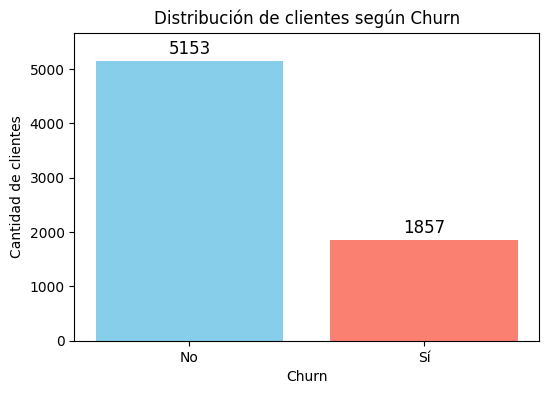

In [40]:
import matplotlib.pyplot as plt

# Contar la cantidad de clientes para cada valor de churn (0 y 1)
churn_counts = df_relevante['churn'].value_counts().sort_index()

# Mapeo para mostrar "No" y "Sí" en el eje X
labels = ['No', 'Sí']

# Crear el gráfico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(labels, churn_counts.values, color=['skyblue', 'salmon'])

# Añadir valores numéricos encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,  # 50 para separar un poco el texto de la barra
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.title('Distribución de clientes según Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.ylim(0, churn_counts.max()*1.1)  # un poco de espacio arriba para texto

plt.show()




### Recuento de evasión por variables categóricas

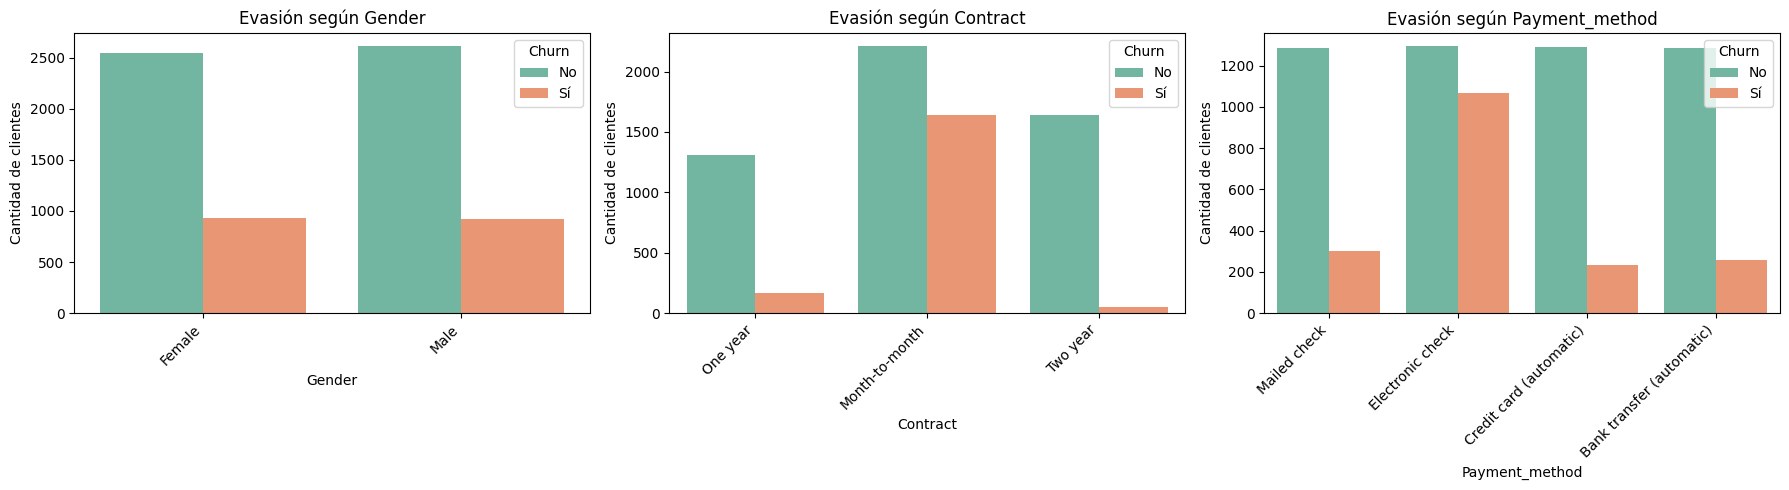

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricas = ['gender', 'contract', 'payment_method']

plt.figure(figsize=(18, 5))

for i, col in enumerate(categoricas, 1):
    plt.subplot(1, len(categoricas), i)
    sns.countplot(data=df_relevante, x=col, hue='churn', palette='Set2')
    plt.title(f'Evasión según {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinear a la derecha

plt.tight_layout()
plt.show()


### Conteo de evasión por variables numéricas

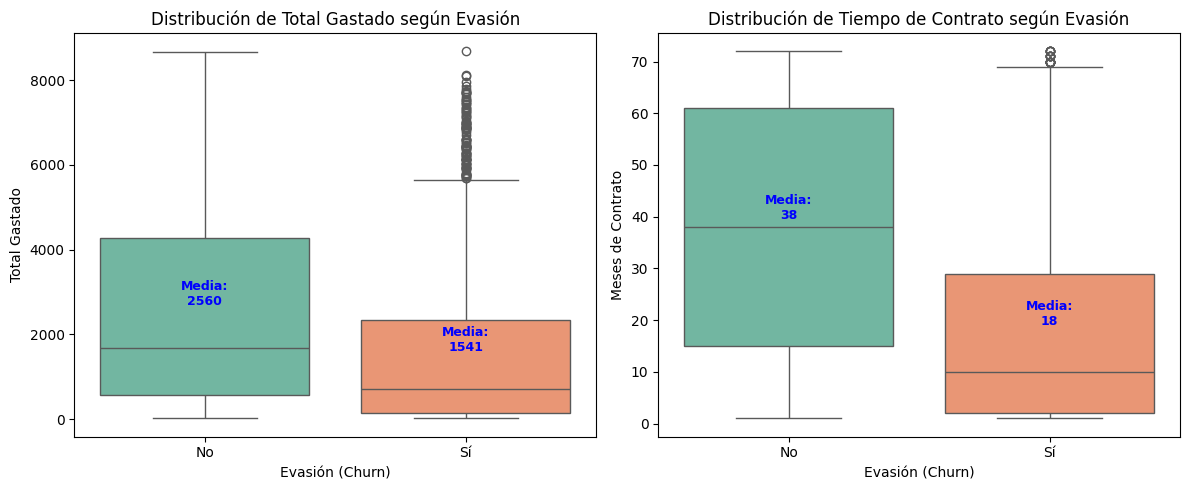

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# Boxplot Total Gastado
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='churn', y='total_charges', data=df_relevante, hue='churn', palette='Set2', dodge=False, legend=False)
plt.title('Distribución de Total Gastado según Evasión')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Total Gastado')
plt.xticks([0, 1], ['No', 'Sí'])

# Agregar media como texto arriba de cada caja
for i, grupo in enumerate([0, 1]):
    data = df_relevante[df_relevante['churn'] == grupo]['total_charges']
    media = np.mean(data)
    ax1.text(i, media + media*0.05, f'Media:\n{media:.0f}', ha='center', color='blue', weight='bold', fontsize=9)

# Boxplot Tiempo de Contrato
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='churn', y='tenure', data=df_relevante, hue='churn', palette='Set2', dodge=False, legend=False)
plt.title('Distribución de Tiempo de Contrato según Evasión')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Meses de Contrato')
plt.xticks([0, 1], ['No', 'Sí'])

for i, grupo in enumerate([0, 1]):
    data = df_relevante[df_relevante['churn'] == grupo]['tenure']
    media = np.mean(data)
    ax2.text(i, media + media*0.05, f'Media:\n{media:.0f}', ha='center', color='blue', weight='bold', fontsize=9)

plt.tight_layout()
plt.show()

#📄Informe final

## 📘 Informe Final del Análisis de Evasión de Clientes (Churn)

---

### 🔹 Introducción

En este análisis se busca comprender los factores que influyen en la **evasión de clientes (churn)** dentro de una empresa de telecomunicaciones. La evasión representa una pérdida directa de ingresos y puede ser un indicativo de insatisfacción del cliente, fallas en los servicios o estrategias poco efectivas de fidelización.

El objetivo principal es **identificar patrones y perfiles de clientes más propensos a cancelar el servicio**, con el fin de ayudar a la empresa a anticipar y reducir estas bajas mediante acciones estratégicas basadas en datos.

---

### 🔹 Limpieza y Tratamiento de Datos

Los datos fueron importados desde un archivo JSON y se realizaron los siguientes pasos de tratamiento:

- Conversión de valores de columnas numéricas que estaban en formato string.
- Eliminación de registros con valores faltantes.
- Estandarización de categorías en variables como `churn`, `gender`, `payment_method`, entre otras.
- Conversión de valores binarios de 0 y 1 a categorías legibles: `"Sí"` y `"No"`.

Estas acciones aseguraron que los datos estuvieran limpios y preparados para un análisis confiable.

---

### 🔹 Análisis Exploratorio de Datos (EDA)

#### 📊 Distribución de la Evasión

Se observó que aproximadamente **26.5% de los clientes han cancelado el servicio**, mientras que el resto permanecen activos.

#### 📊 Evasión por Género

La distribución por género no muestra diferencias significativas en la evasión. Tanto hombres como mujeres presentan porcentajes similares de cancelación.

#### 📊 Evasión por Tipo de Contrato

Se identificó una **mayor evasión entre clientes con contratos mensuales**, lo cual sugiere una menor fidelización o satisfacción en este grupo. Por el contrario, los contratos anuales presentan menor churn.

#### 📊 Evasión por Método de Pago

Los clientes que pagan con **"Electronic check"** presentan una tasa de evasión más alta que otros métodos, como tarjetas de crédito o transferencias automáticas.

#### 📈 Análisis de Variables Numéricas

- **Total Gastado (`total_charges`)**: Los clientes que cancelan tienden a tener **menores montos acumulados**, lo que sugiere que muchos abandonan el servicio después de poco tiempo.
  
- **Tiempo de Contrato (`tenure`)**: Se confirma lo anterior, ya que la mayoría de los clientes que cancelan tienen **menos tiempo de permanencia**.

Se incluyeron medias en los boxplots para reforzar esta observación.

---

### 🔹 Conclusiones e Insights

- **Los clientes con menor tiempo de contrato son los más propensos a cancelar.**
- **Los contratos mensuales y pagos electrónicos se asocian con mayores tasas de evasión.**
- **La evasión no presenta grandes diferencias por género.**
- El **monto total gastado** es considerablemente menor en clientes que han cancelado, reflejando una baja fidelización temprana.

---

### 🔹 Recomendaciones

1. **Incentivar contratos a largo plazo**, ofreciendo descuentos o beneficios para clientes que se comprometan por más tiempo.
2. **Mejorar la experiencia inicial del cliente**, especialmente durante los primeros meses, donde ocurre la mayor evasión.
3. **Analizar el proceso de pago electrónico** para identificar posibles fricciones o insatisfacciones.
4. **Implementar campañas de retención proactiva**, enfocadas en los clientes de bajo `tenure` y `total_charges`.
5. **Diseñar encuestas específicas** para entender mejor las razones de cancelación en clientes recientes.

---
